In [1]:
from IPython.display import display, Math, Latex

In [2]:
%display latex

In [3]:
ES.<rh,ph,z> = EuclideanSpace(coordinates='cylindrical')

In [4]:
ES.cylindrical_coordinates().coord_range()

rh: (0, +oo); ph: [0, 2*pi] (periodic); z: (-oo, +oo)

In [5]:
H = ES.vector_field(
    function('H_rho')(rh,ph,z),
    function('H_phi')(rh,ph,z),
    function('H_z')(rh,ph,z),
    name='H')

In [6]:
E = ES.vector_field(
    function('E_rho')(rh,ph,z),
    function('E_phi')(rh,ph,z),
    function('E_z')(rh,ph,z),
    name='E')

In [7]:
E.display()

E = E_rho(rh, ph, z) e_rh + E_phi(rh, ph, z) e_ph + E_z(rh, ph, z) e_z

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}\right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E}$

$rot\,rot\,\vec{E} = grad\,div\,\vec{E} - Laplasian\,\vec{E}$

$Laplasian\,\vec{E} + \mu\frac{\omega^2}{c^2}\,\epsilon_{\alpha\,\beta}\vec{E} - grad\,div\,\vec{E} = 0$

The Laplacian of a vector field:

In [8]:
from sage.manifolds.operators import *

In [9]:
rot_E = curl(E)
rot_E.display()

curl(E) = -(rh*d(E_phi)/dz - d(E_z)/dph)/rh e_rh + (d(E_rho)/dz - d(E_z)/drh) e_ph + (rh*d(E_phi)/drh + E_phi(rh, ph, z) - d(E_rho)/dph)/rh e_z

In [10]:
grad_div_E = grad(div(E))
grad_div_E.display()

grad(div(E)) = (rh^2*d^2(E_rho)/drh^2 + rh^2*d^2(E_z)/drhdz + rh*d^2(E_phi)/drhdph + rh*d(E_rho)/drh - E_rho(rh, ph, z) - d(E_phi)/dph)/rh^2 e_rh + (rh*d^2(E_rho)/drhdph + rh*d^2(E_z)/dphdz + d^2(E_phi)/dph^2 + d(E_rho)/dph)/rh^2 e_ph + (rh*d^2(E_rho)/drhdz + rh*d^2(E_z)/dz^2 + d^2(E_phi)/dphdz + d(E_rho)/dz)/rh e_z

In [11]:
rot_rot_E = -curl(curl(E))
rot_rot_E.display()

-curl(curl(E)) = (rh^2*d^2(E_rho)/dz^2 - rh^2*d^2(E_z)/drhdz - rh*d^2(E_phi)/drhdph - d(E_phi)/dph + d^2(E_rho)/dph^2)/rh^2 e_rh + (rh^2*d^2(E_phi)/drh^2 + rh^2*d^2(E_phi)/dz^2 + rh*d(E_phi)/drh - rh*d^2(E_rho)/drhdph - rh*d^2(E_z)/dphdz - E_phi(rh, ph, z) + d(E_rho)/dph)/rh^2 e_ph - (rh^2*d^2(E_rho)/drhdz - rh^2*d^2(E_z)/drh^2 + rh*d^2(E_phi)/dphdz + rh*d(E_rho)/dz - rh*d(E_z)/drh - d^2(E_z)/dph^2)/rh^2 e_z

In [12]:
DE = laplacian(E)
DE.display()

Delta(E) = (rh^2*d^2(E_rho)/drh^2 + rh^2*d^2(E_rho)/dz^2 + rh*d(E_rho)/drh - E_rho(rh, ph, z) - 2*d(E_phi)/dph + d^2(E_rho)/dph^2)/rh^2 e_rh + (rh^2*d^2(E_phi)/drh^2 + rh^2*d^2(E_phi)/dz^2 + rh*d(E_phi)/drh - E_phi(rh, ph, z) + d^2(E_phi)/dph^2 + 2*d(E_rho)/dph)/rh^2 e_ph + (rh^2*d^2(E_z)/drh^2 + rh^2*d^2(E_z)/dz^2 + rh*d(E_z)/drh + d^2(E_z)/dph^2)/rh^2 e_z

In [13]:
for i in ES.irange():
    print(i)
    display(Math(latex((DE[i].display()))))
    print(DE[i].display())

1


<IPython.core.display.Math object>

(rh, ph, z) |--> (rh^2*d^2(E_rho)/drh^2 + rh^2*d^2(E_rho)/dz^2 + rh*d(E_rho)/drh - E_rho(rh, ph, z) - 2*d(E_phi)/dph + d^2(E_rho)/dph^2)/rh^2
2


<IPython.core.display.Math object>

(rh, ph, z) |--> (rh^2*d^2(E_phi)/drh^2 + rh^2*d^2(E_phi)/dz^2 + rh*d(E_phi)/drh - E_phi(rh, ph, z) + d^2(E_phi)/dph^2 + 2*d(E_rho)/dph)/rh^2
3


<IPython.core.display.Math object>

(rh, ph, z) |--> (rh^2*d^2(E_z)/drh^2 + rh^2*d^2(E_z)/dz^2 + rh*d(E_z)/drh + d^2(E_z)/dph^2)/rh^2


In [14]:
omega = var("omega")
c = var("c")
mu = var("mu")

In [15]:
epsilon_rh_rh = var("epsilon_rh_rh")

In [16]:
epsilon_ph_ph = var("epsilon_ph_ph")

In [17]:
epsilon_z_z = var("epsilon_z_z")

In [18]:
eq_rh = (DE[1] + mu * epsilon_rh_rh * omega^2 / c^2 * E[1]).expand()

In [19]:
eq_ph = (DE[2] + mu * epsilon_ph_ph * omega^2 / c^2 * E[2]).expand()

In [20]:
eq_z = (DE[3] + mu * epsilon_z_z * omega^2 / c^2 * E[3]).expand()

In [21]:
eq_rh.display()

(rh, ph, z) |--> epsilon_rh_rh*mu*omega^2*E_rho(rh, ph, z)/c^2 + d(E_rho)/drh/rh - E_rho(rh, ph, z)/rh^2 - 2*d(E_phi)/dph/rh^2 + d^2(E_rho)/dph^2/rh^2 + d^2(E_rho)/drh^2 + d^2(E_rho)/dz^2

In [22]:
eq_ph.display()

(rh, ph, z) |--> epsilon_ph_ph*mu*omega^2*E_phi(rh, ph, z)/c^2 + d(E_phi)/drh/rh - E_phi(rh, ph, z)/rh^2 + d^2(E_phi)/dph^2/rh^2 + 2*d(E_rho)/dph/rh^2 + d^2(E_phi)/drh^2 + d^2(E_phi)/dz^2

In [23]:
eq_z.display()

(rh, ph, z) |--> epsilon_z_z*mu*omega^2*E_z(rh, ph, z)/c^2 + d(E_z)/drh/rh + d^2(E_z)/dph^2/rh^2 + d^2(E_z)/drh^2 + d^2(E_z)/dz^2

desolve_laplace(eq_z,E[3],ivar=rh)

In [24]:
k = var("k")
m = var("m")
# kappa_z^2 = epsilon_z_z * mu * omega^2 / c^2 - k^2
kappa_z = var("kappa_z")

# kappa_rh^2 = epsilon_rh_rh * mu * omega^2 / c^2 - k^2
kappa_rh = var("kappa_rh")

# kappa_ph^2 = epsilon_ph_ph * mu * omega^2 / c^2 - k^2
kappa_ph = var("kappa_ph")

In [25]:
eq_z_ex = eq_z.expr().subs(diff(E_z(rh, ph, z), z, z) == -k^2*E_z(rh, ph, z))
eq_z_ex

-k^2*E_z(rh, ph, z) + epsilon_z_z*mu*omega^2*E_z(rh, ph, z)/c^2 + diff(E_z(rh, ph, z), rh)/rh + diff(E_z(rh, ph, z), ph, ph)/rh^2 + diff(E_z(rh, ph, z), rh, rh)

In [26]:
eq_z_ex = (eq_z_ex.subs(epsilon_z_z * mu * omega^2 * E_z(rh, ph, z) / c^2 == (kappa_z^2 + k^2) * E_z(rh, ph, z))) \
    .full_simplify() \
    .expand()
eq_z_ex

kappa_z^2*E_z(rh, ph, z) + diff(E_z(rh, ph, z), rh)/rh + diff(E_z(rh, ph, z), ph, ph)/rh^2 + diff(E_z(rh, ph, z), rh, rh)

In [27]:
eq_z_ex = eq_z_ex.subs(diff(E_z(rh, ph, z), ph, ph) == -m^2*E_z(rh, ph, z))
eq_z_ex

kappa_z^2*E_z(rh, ph, z) - m^2*E_z(rh, ph, z)/rh^2 + diff(E_z(rh, ph, z), rh)/rh + diff(E_z(rh, ph, z), rh, rh)

In [28]:
psi_m = var("psi_m")

desolve(eq_z_ex == 0, E_z(rh, ph, z), ivar=rh, contrib_ode=True)

E_z(rh, ph, z) = E_z(rh, ph, z)

In [29]:
E_sol_z(rh, ph, z) = bessel_J(m, kappa_z * rh)*sin(m * ph + psi_m) * exp(-I*k*z)

In [35]:
E_sol_z(rh, ph, z)

bessel_J(m, kappa_z*rh)*e^(-I*k*z)*sin(m*ph + psi_m)

In [72]:
#eq_z_sol = laplacian(E_sol_z(rh, ph, z)) + mu * epsilon_z_z * omega^2 / c^2 * E_sol_z(rh, ph, z)

In [73]:
#eq_z_sol.expr().subs(m == 0, psi_m == 0)

In [74]:
#eq_z_sol.expr().subs(m == 1, psi_m == 0).full_simplify().expand()

In [75]:
eq_rh.expr()

epsilon_rh_rh*mu*omega^2*E_rho(rh, ph, z)/c^2 + diff(E_rho(rh, ph, z), rh)/rh - E_rho(rh, ph, z)/rh^2 - 2*diff(E_phi(rh, ph, z), ph)/rh^2 + diff(E_rho(rh, ph, z), ph, ph)/rh^2 + diff(E_rho(rh, ph, z), rh, rh) + diff(E_rho(rh, ph, z), z, z)

In [40]:
eq_rh_ex = eq_rh.expr().subs(diff(E_rho(rh, ph, z), z, z) == -k^2*E_rho(rh, ph, z))
eq_rh_ex

-k^2*E_rho(rh, ph, z) + epsilon_rh_rh*mu*omega^2*E_rho(rh, ph, z)/c^2 + diff(E_rho(rh, ph, z), rh)/rh - E_rho(rh, ph, z)/rh^2 - 2*diff(E_phi(rh, ph, z), ph)/rh^2 + diff(E_rho(rh, ph, z), ph, ph)/rh^2 + diff(E_rho(rh, ph, z), rh, rh)

In [41]:
eq_rh_ex = (eq_rh_ex.subs(epsilon_rh_rh * mu * omega^2 * E_rho(rh, ph, z) / c^2 == (kappa_rh^2 + k^2) * E_rho(rh, ph, z))).full_simplify().expand()
eq_rh_ex

kappa_rh^2*E_rho(rh, ph, z) + diff(E_rho(rh, ph, z), rh)/rh - E_rho(rh, ph, z)/rh^2 - 2*diff(E_phi(rh, ph, z), ph)/rh^2 + diff(E_rho(rh, ph, z), ph, ph)/rh^2 + diff(E_rho(rh, ph, z), rh, rh)

In [42]:
eq_rh_ex = eq_rh_ex.subs(diff(E_rho(rh, ph, z), ph, ph) == -m^2*E_rho(rh, ph, z))
eq_rh_ex

kappa_rh^2*E_rho(rh, ph, z) - m^2*E_rho(rh, ph, z)/rh^2 + diff(E_rho(rh, ph, z), rh)/rh - E_rho(rh, ph, z)/rh^2 - 2*diff(E_phi(rh, ph, z), ph)/rh^2 + diff(E_rho(rh, ph, z), rh, rh)

In [43]:
eq_ph.expr()

epsilon_ph_ph*mu*omega^2*E_phi(rh, ph, z)/c^2 + diff(E_phi(rh, ph, z), rh)/rh - E_phi(rh, ph, z)/rh^2 + diff(E_phi(rh, ph, z), ph, ph)/rh^2 + 2*diff(E_rho(rh, ph, z), ph)/rh^2 + diff(E_phi(rh, ph, z), rh, rh) + diff(E_phi(rh, ph, z), z, z)

In [44]:
eq_ph_ex = eq_ph.expr().subs(diff(E_phi(rh, ph, z), z, z) == -k^2*E_phi(rh, ph, z))
eq_ph_ex

-k^2*E_phi(rh, ph, z) + epsilon_ph_ph*mu*omega^2*E_phi(rh, ph, z)/c^2 + diff(E_phi(rh, ph, z), rh)/rh - E_phi(rh, ph, z)/rh^2 + diff(E_phi(rh, ph, z), ph, ph)/rh^2 + 2*diff(E_rho(rh, ph, z), ph)/rh^2 + diff(E_phi(rh, ph, z), rh, rh)

In [45]:
eq_ph_ex = (eq_ph_ex.subs(epsilon_ph_ph * mu * omega^2 * E_phi(rh, ph, z) / c^2 == (kappa_ph^2 + k^2) * E_phi(rh, ph, z))).full_simplify().expand()
eq_ph_ex

kappa_ph^2*E_phi(rh, ph, z) + diff(E_phi(rh, ph, z), rh)/rh - E_phi(rh, ph, z)/rh^2 + diff(E_phi(rh, ph, z), ph, ph)/rh^2 + 2*diff(E_rho(rh, ph, z), ph)/rh^2 + diff(E_phi(rh, ph, z), rh, rh)

In [46]:
eq_ph_ex = eq_ph_ex.subs(diff(E_phi(rh, ph, z), ph, ph) == -m^2*E_phi(rh, ph, z))
eq_ph_ex

kappa_ph^2*E_phi(rh, ph, z) - m^2*E_phi(rh, ph, z)/rh^2 + diff(E_phi(rh, ph, z), rh)/rh - E_phi(rh, ph, z)/rh^2 + 2*diff(E_rho(rh, ph, z), ph)/rh^2 + diff(E_phi(rh, ph, z), rh, rh)

In [47]:
eq_rh_ex

kappa_rh^2*E_rho(rh, ph, z) - m^2*E_rho(rh, ph, z)/rh^2 + diff(E_rho(rh, ph, z), rh)/rh - E_rho(rh, ph, z)/rh^2 - 2*diff(E_phi(rh, ph, z), ph)/rh^2 + diff(E_rho(rh, ph, z), rh, rh)

In [48]:
eq_ph_ex.operands()

[kappa_ph^2*E_phi(rh, ph, z),
 -m^2*E_phi(rh, ph, z)/rh^2,
 diff(E_phi(rh, ph, z), rh)/rh,
 -E_phi(rh, ph, z)/rh^2,
 2*diff(E_rho(rh, ph, z), ph)/rh^2,
 diff(E_phi(rh, ph, z), rh, rh)]

In [49]:
eq_rh_ex.operands()[5] + eq_rh_ex.operands()[2] + eq_rh_ex.operands()[0] + eq_rh_ex.operands()[1]

kappa_rh^2*E_rho(rh, ph, z) - m^2*E_rho(rh, ph, z)/rh^2 + diff(E_rho(rh, ph, z), rh)/rh + diff(E_rho(rh, ph, z), rh, rh)

In [50]:
eq_ph_ex.operands()[5] + eq_ph_ex.operands()[2] + eq_ph_ex.operands()[0] + eq_ph_ex.operands()[1]

kappa_ph^2*E_phi(rh, ph, z) - m^2*E_phi(rh, ph, z)/rh^2 + diff(E_phi(rh, ph, z), rh)/rh + diff(E_phi(rh, ph, z), rh, rh)

In [51]:
def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [52]:
E_sol_rh(rh, ph, z) = - k / kappa_rh * bessel_J_diff(m, kappa_rh * rh)*sin(m * ph + psi_m)*exp(-I*k*z)

In [53]:
E_sol_ph(rh, ph, z) = -m * k / kappa_ph^2 / rh * bessel_J(m, kappa_ph * rh)*cos(m * ph + psi_m)*exp(-I*k*z)

In [54]:
E_sol_rh(rh, ph, z)

1/2*k*(bessel_J(m + 1, kappa_rh*rh) - bessel_J(m - 1, kappa_rh*rh))*e^(-I*k*z)*sin(m*ph + psi_m)/kappa_rh

In [55]:
E_sol_ph(rh, ph, z)

-k*m*bessel_J(m, kappa_ph*rh)*cos(m*ph + psi_m)*e^(-I*k*z)/(kappa_ph^2*rh)

In [56]:
((eq_rh_ex.operands()[3] + eq_rh_ex.operands()[4])*rh^2).full_simplify() == 0

-E_rho(rh, ph, z) - 2*diff(E_phi(rh, ph, z), ph) == 0

In [57]:
((eq_ph_ex.operands()[3] + eq_ph_ex.operands()[4])*rh^2).full_simplify() == 0

-E_phi(rh, ph, z) + 2*diff(E_rho(rh, ph, z), ph) == 0

In [58]:
((E_sol_rh(rh, ph, z) + 2*E_sol_ph(rh, ph, z).diff(ph))/sin(m * ph + psi_m)/exp(-I*k*z)/k).full_simplify().expand()

1/2*bessel_J(m + 1, kappa_rh*rh)/kappa_rh - 1/2*bessel_J(m - 1, kappa_rh*rh)/kappa_rh + 2*m^2*bessel_J(m, kappa_ph*rh)/(kappa_ph^2*rh)

In [59]:
((2*E_sol_rh(rh, ph, z).diff(ph) - E_sol_ph(rh, ph, z))/cos(m * ph + psi_m)/exp(-I*k*z)/k/m).full_simplify().expand()

bessel_J(m + 1, kappa_rh*rh)/kappa_rh - bessel_J(m - 1, kappa_rh*rh)/kappa_rh + bessel_J(m, kappa_ph*rh)/(kappa_ph^2*rh)

In [60]:
E_sol = ES.vector_field(
    E_sol_rh(rh, ph, z),
    E_sol_ph(rh, ph, z),
    E_sol_z(rh, ph, z),
    name='E_sol')

In [61]:
E_sol.display()

E_sol = 1/2*k*(bessel_J(m + 1, kappa_rh*rh) - bessel_J(m - 1, kappa_rh*rh))*e^(-I*k*z)*sin(m*ph + psi_m)/kappa_rh e_rh - k*m*bessel_J(m, kappa_ph*rh)*cos(m*ph + psi_m)*e^(-I*k*z)/(kappa_ph^2*rh) e_ph + bessel_J(m, kappa_z*rh)*e^(-I*k*z)*sin(m*ph + psi_m) e_z

In [62]:
div_E_sol = div(E_sol)
div_E_sol.expr()

1/4*(4*k*kappa_rh*m^2*bessel_J(m, kappa_ph*rh)*cos(psi_m)*sin(m*ph) + 4*k*kappa_rh*m^2*bessel_J(m, kappa_ph*rh)*cos(m*ph)*sin(psi_m) - ((k*kappa_ph^2*kappa_rh*bessel_J(m + 2, kappa_rh*rh) + k*kappa_ph^2*kappa_rh*bessel_J(m - 2, kappa_rh*rh) - 2*k*kappa_ph^2*kappa_rh*bessel_J(m, kappa_rh*rh) + 4*I*k*kappa_ph^2*kappa_rh*bessel_J(m, kappa_z*rh))*cos(psi_m)*sin(m*ph) + (k*kappa_ph^2*kappa_rh*bessel_J(m + 2, kappa_rh*rh) + k*kappa_ph^2*kappa_rh*bessel_J(m - 2, kappa_rh*rh) - 2*k*kappa_ph^2*kappa_rh*bessel_J(m, kappa_rh*rh) + 4*I*k*kappa_ph^2*kappa_rh*bessel_J(m, kappa_z*rh))*cos(m*ph)*sin(psi_m))*rh^2 + 2*((k*kappa_ph^2*bessel_J(m + 1, kappa_rh*rh) - k*kappa_ph^2*bessel_J(m - 1, kappa_rh*rh))*cos(psi_m)*sin(m*ph) + (k*kappa_ph^2*bessel_J(m + 1, kappa_rh*rh) - k*kappa_ph^2*bessel_J(m - 1, kappa_rh*rh))*cos(m*ph)*sin(psi_m))*rh)*e^(-I*k*z)/(kappa_ph^2*kappa_rh*rh^2)

In [63]:
div_E_sol.expr().subs(m == 0, psi_m == 0)

0

In [64]:
div_E_sol.expr().subs(m == 1, psi_m == 0)

-1/4*((k*kappa_ph^2*kappa_rh*bessel_J(3, kappa_rh*rh) - 2*k*kappa_ph^2*kappa_rh*bessel_J(1, kappa_rh*rh) + 4*I*k*kappa_ph^2*kappa_rh*bessel_J(1, kappa_z*rh) + k*kappa_ph^2*kappa_rh*bessel_J(-1, kappa_rh*rh))*rh^2*sin(ph) - 4*k*kappa_rh*bessel_J(1, kappa_ph*rh)*sin(ph) - 2*(k*kappa_ph^2*bessel_J(2, kappa_rh*rh) - k*kappa_ph^2*bessel_J(0, kappa_rh*rh))*rh*sin(ph))*e^(-I*k*z)/(kappa_ph^2*kappa_rh*rh^2)

In [65]:
find_root(bessel_J(0,x)==0,0,2*pi)

5.520078110286276

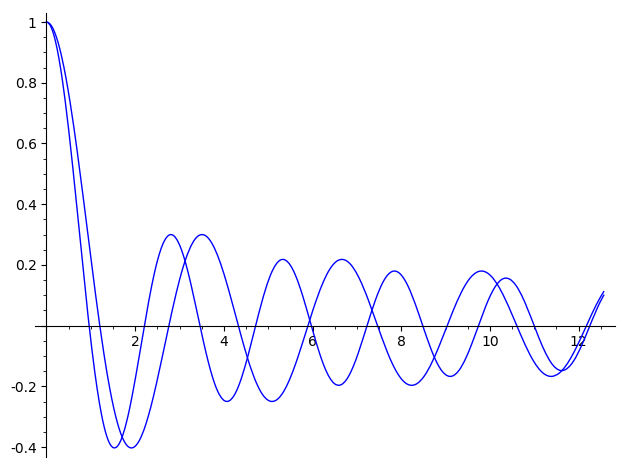

In [66]:
p = sage.plot.graphics.Graphics()
for i in range(2 ):
    p += plot(bessel_J(0, (2+0.5*i)*x),(x,0,4*pi))
p.show()

In [67]:
eq_z = eq_z.subs()

eq_z.subs(epsilon_z_z * mu * omega^2 / c^2 == kappa_z^2 + k^2)

epsilon_z_z*mu*omega^2*E_z(rh, ph, z)/c^2 + d(E_z)/drh/rh + d^2(E_z)/dph^2/rh^2 + d^2(E_z)/drh^2 + d^2(E_z)/dz^2

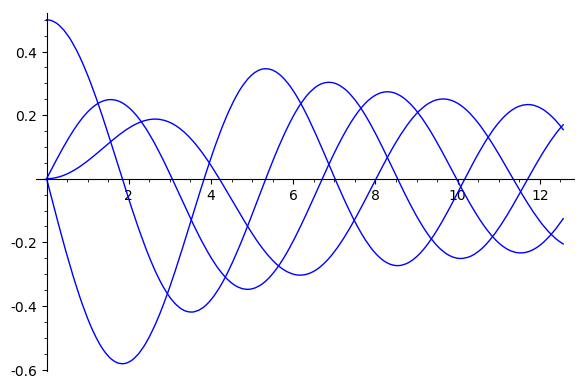

In [69]:
p = sage.plot.graphics.Graphics()
for i in range(4):
    p += plot(bessel_J(i, x).diff(x),(x,0,4*pi))
p.show()

In [70]:
display(Math(latex(bessel_J(1, x).diff(x))))

<IPython.core.display.Math object>

In [71]:
display(Math(latex(bessel_J(0, x).diff(x))))

<IPython.core.display.Math object>